In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

Read in data (c/o Andy Casey)

In [3]:
a = open('../data/open_clusters4_tags_dr13_30eB_nofilt_5026_norm8.pickle', 'r' ) # can do with aspcap 
b = pickle.load(a)
a.close()
dataout = b[0]
dataout_labels = ["teff", "logg", "[Fe/H]", "C", "N", "O", "Na", "Mg", "Al", "Si", "S", "K", "Ca", "Ti", "V", "Mn", "Ni", "P", "Cr", "Co", "Cu", "Rb", "FWHM"]
a = open('../data/open_clusters_name4.txt', 'r')
al = a.readlines()
names = []
for each in al:
    names.append(each.strip()) 
names = np.asarray(names)

In [40]:
c = np.genfromtxt('../data/NGC6791_xmatch.csv', delimiter=',', dtype=None, names=True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if __name__ == '__main__':


In [4]:
inds = np.where(names == 'N6791')[0] # select NGC 6791 members only
params = dataout[inds,0:3]
abunds = dataout[inds,3:-1]
twomass_ids = np.asarray(b[-1])[inds]

In [64]:
abund_errs = np.empty_like(abunds)
for i in range(abunds.shape[1]):
    abund_errs[:,i] = b[1][inds][3+i,3+i]
# TODO: add second error component in quadrature

In [65]:
param_errs = np.empty_like(params)
for i in range(params.shape[1]):
    param_errs[:,i] = b[1][inds][i,i]
print param_errs #i don't think i'm doing this right, why are they so small??

[[ 4.83316678e-04  1.50872004e-04  1.89734632e-04]
 [ 1.47205883e-04  7.04606439e-04  1.77355811e-04]
 [ 2.39566083e-04  1.75556331e-04  3.66674394e-04]
 [ 8.68636450e-04  6.97546202e-04  1.95295700e-04]
 [-6.10091140e-04 -4.23267885e-04 -3.85494324e-04]
 [ 5.82293847e-04 -3.33898415e-04  1.71792183e-04]
 [ 3.07361930e-05 -3.83741481e-04 -4.80813620e-04]
 [ 4.12321193e-04  6.73912339e-05  4.08883172e-05]
 [-8.44839367e-05 -6.76255996e-06 -3.69643731e-04]
 [ 2.91535288e-04 -3.16739975e-04  7.97115011e-05]
 [-3.33605786e-04 -1.49335453e-04 -6.51209787e-04]
 [ 6.13287798e-06 -2.99094646e-04 -1.67878472e-04]
 [ 1.59006197e-04 -3.58033721e-04 -4.42398968e-04]
 [ 1.39092390e-03  3.90677109e-04  6.65051522e-04]
 [ 1.45346045e-04  2.85770246e-04 -3.72380868e-04]
 [-2.73674444e-05 -3.55490518e-05 -2.46301664e-04]
 [-5.46307628e-04  6.70732318e-05 -4.19007612e-04]
 [ 2.93294310e-05 -4.32166073e-04 -2.92669396e-04]
 [ 3.57482905e-04 -1.19424546e-04 -1.31658608e-04]
 [ 9.07172200e-07  9.35964545e-

[ 1.89734632e-04  1.77355811e-04  3.66674394e-04  1.95295700e-04
 -3.85494324e-04  1.71792183e-04 -4.80813620e-04  4.08883172e-05
 -3.69643731e-04  7.97115011e-05 -6.51209787e-04 -1.67878472e-04
 -4.42398968e-04  6.65051522e-04 -3.72380868e-04 -2.46301664e-04
 -4.19007612e-04 -2.92669396e-04 -1.31658608e-04 -3.76572662e-04
 -9.55213363e-05 -8.18129860e-04  2.64719028e-18]


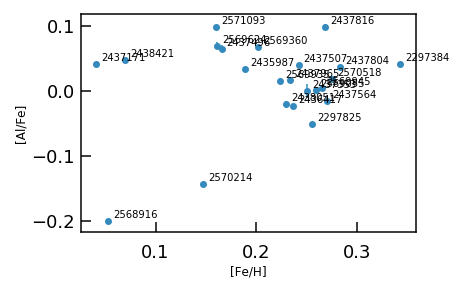

In [67]:
plt.errorbar(params[:,-1], abunds[:,5], xerr=param_errs[:,-1], yerr=abund_errs[:,5], fmt='o')
for i,n in enumerate(c['KIC']):
    plt.text(params[i,-1] + 0.005, abunds[i,5] + 0.005, n)
plt.ylabel('[Al/Fe]')
plt.xlabel('[Fe/H]')

Text(0.5,0,'[Fe/H]')

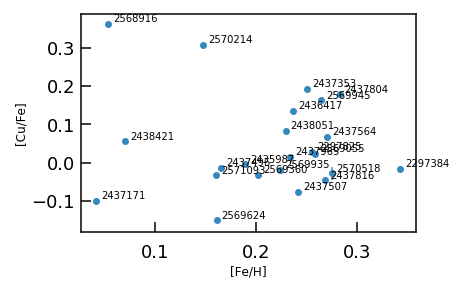

In [68]:
plt.errorbar(params[:,-1], abunds[:,17], xerr=param_errs[:,-1], yerr=abund_errs[:,17], fmt='o')
for i,n in enumerate(c['KIC']):
    plt.text(params[i,-1] + 0.005, abunds[i,17] + 0.005, n)
plt.ylabel('[Cu/Fe]')
plt.xlabel('[Fe/H]')

calculate condensation temperature fits (ignoring CNO because those are complicated!)

In [43]:
import warnings; warnings.simplefilter('ignore')
import q2
Tc = np.asarray([q2.abundances.gettc(x+'I') for x in dataout_labels[3:-1]])

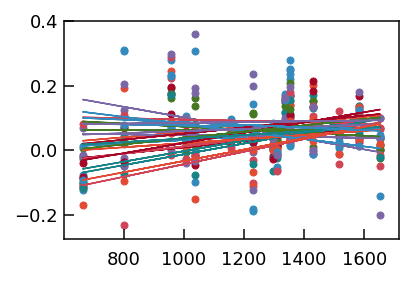

In [44]:
slopes = []
intercepts = []
for i in range(len(twomass_ids)):
    xs = Tc[3:]
    ys = abunds[i,3:]
    A = np.vander(xs, 2)
    m = np.ones(len(xs), dtype=bool) # mask
    w = np.linalg.solve(np.dot(A[m].T, A[m]), np.dot(A[m].T, ys[m]))
    plt.scatter(xs, ys)
    mu = np.dot(A, w)
    slopes.append(w[0])
    intercepts.append(w[1])
    plt.plot(xs, mu)

Text(0.5,0,'T$_c$ slope ($\\times 10^4$ dex K$^{-1}$)')

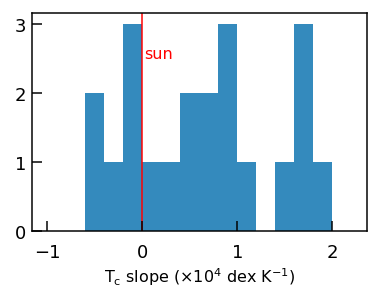

In [45]:
plt.hist(np.asarray(slopes) * 1.e4, bins=np.arange(-1.0, 2.4, 0.2))
plt.axvline(0.0, c='r')
plt.text(0.02, 2.5, 'sun', color='r', fontsize=16)
plt.xlabel(r'T$_c$ slope ($\times 10^4$ dex K$^{-1}$)', fontsize=16)